In [1]:
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("C:/Users/mishr/Desktop/Newsgroups"):
    for document in os.listdir("C:/Users/mishr/Desktop/Newsgroups/"+category):
        with open("C:/Users/mishr/Desktop/Newsgroups/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,random_state=5)

In [5]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic=sorted(dic.items(),key=lambda x:x[1],reverse=True)
dic

[('edu', 122550),
 ('cmu', 39114),
 ('com', 37791),
 ('news', 25707),
 ('not', 24934),
 ('srv', 24276),
 ('cantaloupe', 19554),
 ('net', 19150),
 ('message', 16428),
 ('subject', 16202),
 ('lines', 15687),
 ('date', 15598),
 ('apr', 15365),
 ('newsgroups', 15317),
 ('path', 15248),
 ('can', 14912),
 ('organization', 14887),
 ('state', 14144),
 ('gmt', 13399),
 ('ohio', 11931),
 ('one', 11767),
 ('will', 11280),
 ('writes', 11043),
 ('article', 10093),
 ('comp', 9954),
 ('references', 9784),
 ('talk', 9215),
 ('misc', 8920),
 ('ans', 8337),
 ('howland', 8271),
 ('reston', 8223),
 ('sender', 8222),
 ('don', 7951),
 ('like', 7769),
 ('people', 7709),
 ('university', 7436),
 ('just', 7428),
 ('posting', 7367),
 ('nntp', 7059),
 ('mps', 6919),
 ('know', 6725),
 ('host', 6711),
 ('sci', 6642),
 ('get', 6466),
 ('usenet', 6235),
 ('think', 6232),
 ('zaphod', 6227),
 ('may', 6029),
 ('alt', 5871),
 ('politics', 5866),
 ('also', 5627),
 ('windows', 5597),
 ('use', 5304),
 ('time', 5252),
 ('har

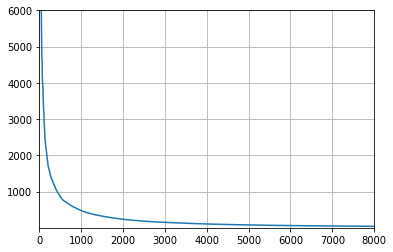

In [6]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
import matplotlib.pyplot as plt
features=dic
axis_X=[]
axis_Y=[]
for i in range(len(features)):
    axis_X.append(i)
    axis_Y.append(features[i][1])
plt.plot(axis_X,axis_Y)
plt.axis([0,8000,1,6000])
plt.grid()
plt.show()

In [7]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'howland',
 'reston',
 'sender',
 'don',
 'like',
 'people',
 'university',
 'just',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'usenet',
 'think',
 'zaphod',
 'may',
 'alt',
 'politics',
 'also',
 'windows',
 'use',
 'time',
 'harvard',
 'near',
 'eng',
 'rutgers',
 'new',
 'rec',
 'good',
 'noc',
 'crabapple',
 'soc',
 'well',
 'das',
 'system',
 'sei',
 'xref',
 'even',
 'cis',
 'now',
 'see',
 'europa',
 'uunet',
 'gtefsd',
 'ece',
 'world',
 'god',
 'religion',
 'two',
 'way',
 'org',
 'much',
 'first',
 'many',
 'say',
 'make',
 'gov',
 'christian',
 'right',
 'max',
 'rochester',
 'distribution',
 'space',
 'mail',
 'club',
 'want',
 'anyone',
 'andrew',
 'reply',
 'gatech'

In [8]:
#Making x_train_dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [9]:
#Making x_test_dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [10]:
# PRINTING x_train_dataset AND x_test_dataset
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[12  3  0 ...  0  0  0]
 [ 5  5  1 ...  0  0  0]
 [ 4  2  0 ...  0  0  0]
 ...
 [ 6  1  1 ...  0  0  0]
 [ 3  2 12 ...  0  0  0]
 [ 4  1  0 ...  0  0  0]]
--------------------------
[[8 1 0 ... 0 0 0]
 [9 3 0 ... 0 0 0]
 [4 3 6 ... 0 0 0]
 ...
 [5 4 9 ... 0 0 0]
 [8 1 0 ... 0 0 0]
 [6 3 5 ... 0 0 0]]


### USING INBUILT MULTINOMIAL NAIVE BAYES

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

In [12]:
# Predict the output and calculate confusion matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_predict=clf.predict(x_test_dataset)
print("Score on training data",clf.score(x_train_dataset,y_train))
print("Score on testing data",clf.score(x_test_dataset,y_test))
print("Confusion Matrix :-------------------------------------------------------------","\n",confusion_matrix(y_test,y_predict))
print("Classification Report :--------------------------------------------------------","\n",classification_report(y_test,y_predict))

Score on training data 0.8919783956791358
Score on testing data 0.8596
Confusion Matrix :------------------------------------------------------------- 
 [[195   0   1   0   1   0   1   1   1   0   0   1   0   1   0   2   0   0
    0  39]
 [  0 167  18  17  12  11  11   3   0   0   0   2   4   1   0   0   0   0
    0   0]
 [  0   1 190  18   7  11   4   0   0   0   0   1   0   0   1   0   0   0
    0   0]
 [  0   1   8 185  31   0   5   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   0  19 207   0   5   0   0   0   0   0   4   0   1   0   0   0
    0   0]
 [  0  11  18   9   2 199   2   0   3   0   0   0   4   0   2   0   0   0
    0   0]
 [  0   1   0   2   1   0 253   5   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0  11 229   6   1   0   0   2   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   1   5   3 224   1   0   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   6   1 231  10   0   0   0   0   0   1   0
    0   

### USE SELF IMPLEMENTED Multinomial Naive Bayes

In [13]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
    return count

In [14]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [15]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [16]:
def predict(x_test,dic):
    y_pred=[]
    for i in x_test:
        y_pred.append(predict_for_single(i,dic))
    return y_predict

In [17]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [18]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict(x_test_dataset,dictionary)

In [20]:
# prediction on training data
y_predict_train=predict(x_train_dataset,dictionary)

In [21]:
print("Score on training data",score(y_train,y_predict_train))
print("Score on testing data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data 0.0472
Score on testing data: 0.8596
[[195   0   1   0   1   0   1   1   1   0   0   1   0   1   0   2   0   0
    0  39]
 [  0 167  18  17  12  11  11   3   0   0   0   2   4   1   0   0   0   0
    0   0]
 [  0   1 190  18   7  11   4   0   0   0   0   1   0   0   1   0   0   0
    0   0]
 [  0   1   8 185  31   0   5   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   0  19 207   0   5   0   0   0   0   0   4   0   1   0   0   0
    0   0]
 [  0  11  18   9   2 199   2   0   3   0   0   0   4   0   2   0   0   0
    0   0]
 [  0   1   0   2   1   0 253   5   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0  11 229   6   1   0   0   2   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   1   5   3 224   1   0   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   6   1 231  10   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   3   2   2  17 236   0   0   0   0   0   0   0
    0   0]
 [  0

###### while comparing the score on testing data we conclude that inbuilt Multinomial Naive bayes and out implemented naive bayes works exactly same. But on other side while comparing the score with the training data we conclue that inbuilt Multinomial Naive Bayes really works very good and our own implemented Multinomial naive bayes really performs very bad.